<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement--Prediction-of-customers-who-will-churn-in-a-telecom-company" data-toc-modified-id="Problem-statement--Prediction-of-customers-who-will-churn-in-a-telecom-company-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement--Prediction of customers who will churn in a telecom company</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Statsmodel-analysis-and-prediction" data-toc-modified-id="Statsmodel-analysis-and-prediction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Statsmodel analysis and prediction</a></span></li><li><span><a href="#Hyper-parameter-tuning" data-toc-modified-id="Hyper-parameter-tuning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hyper parameter tuning</a></span></li><li><span><a href="#logistic-regression" data-toc-modified-id="logistic-regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>logistic regression</a></span></li><li><span><a href="#Best-features" data-toc-modified-id="Best-features-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Best features</a></span></li><li><span><a href="#ROAUC-curve" data-toc-modified-id="ROAUC-curve-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>ROAUC curve</a></span></li><li><span><a href="#Threshold-adjustment" data-toc-modified-id="Threshold-adjustment-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Threshold adjustment</a></span></li><li><span><a href="#Support-vector-machine" data-toc-modified-id="Support-vector-machine-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Support vector machine</a></span></li><li><span><a href="#Naive-bayes" data-toc-modified-id="Naive-bayes-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Naive bayes</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Decision-Tree-and-Ensemble-Algorithms" data-toc-modified-id="Decision-Tree-and-Ensemble-Algorithms-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Decision Tree and Ensemble Algorithms</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Boosting</a></span></li><li><span><a href="#Test-Set-Prediction" data-toc-modified-id="Test-Set-Prediction-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Test Set Prediction</a></span></li></ul></div>

# Problem statement--Prediction of customers who will churn in a telecom company

# Data description

In [ ]:
"" """""
Dataset Feature Description
The Dataset contains the following columns:

Column Name	       Description
CustomerID	       Passenger Identity
Gender	           Whether the customer is a male or a female
SeniorCitizen	   Whether the customer is a senior citizen or not (1, 0)
Partner	           Whether the customer has a partner or not (Yes, No)
Dependents         Whether the customer has dependents or not (Yes, No)
Tenure	           Number of months the customer has stayed with the company
PhoneService       Whether the customer has a phone service or not (Yes, No)
MultipleLines	   Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService	   Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity	   Whether the customer has online security or not (Yes, No, No internet service)
OnlineBackup	   Whether the customer has online backup or not (Yes, No, No internet service)
DeviceProtection   Whether the customer has device protection or not (Yes, No, No internet service)
TechSupport	       Whether the customer has tech support or not (Yes, No, No internet service)
StreamingTV	       Whether the customer has streaming TV or not (Yes, No, No internet service)
StreamingMovies    Whether the customer has streaming movies or not (Yes, No, No internet service)
Contract	       The contract term of the customer (Month-to-month, One year, Two year)
PaperlessBilling   Whether the customer has paperless billing or not (Yes, No)
PaymentMethod	   The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges	   The amount charged to the customer monthly
TotalCharges	   The total amount charged to the customer
Churn	Whether    the customer churned or not (Yes or No)

""""""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('churn_train.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5634 non-null   category
 1   gender            5634 non-null   category
 2   SeniorCitizen     5634 non-null   int64   
 3   Partner           5634 non-null   category
 4   Dependents        5634 non-null   category
 5   tenure            5634 non-null   int64   
 6   PhoneService      5634 non-null   category
 7   MultipleLines     5634 non-null   category
 8   InternetService   5634 non-null   category
 9   OnlineSecurity    5634 non-null   category
 10  OnlineBackup      5634 non-null   category
 11  DeviceProtection  5634 non-null   category
 12  TechSupport       5634 non-null   category
 13  StreamingTV       5634 non-null   category
 14  StreamingMovies   5634 non-null   category
 15  Contract          5634 non-null   category
 16  PaperlessBilling  5634 n

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,2817.500000,1.496273,1.161874,1.520412,1.704295,32.079695,1.097089,1.617856,2.223287,2.280440,2.226660,2.222222,2.276890,2.167909,2.176074,2.312389,1.589457,2.656727,547.230209,2578.015087,1.269968
std,1626.540039,0.500030,0.368368,0.499628,0.456399,20.366408,0.296105,0.656022,0.779088,0.797086,0.780277,0.778709,0.796099,0.757138,0.760667,0.831882,0.491976,1.166588,396.655718,1529.662312,0.443982
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1409.250000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,203.000000,1237.250000,1.000000
50%,2817.500000,1.000000,1.000000,2.000000,2.000000,29.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,485.000000,2541.500000,1.000000
75%,4225.750000,2.000000,1.000000,2.000000,2.000000,49.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,839.750000,3894.750000,2.000000
max,5634.000000,2.000000,2.000000,2.000000,2.000000,73.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,1494.000000,5291.000000,2.000000


# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


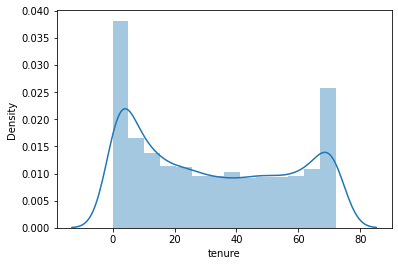

In [ ]:
sns.distplot(df.tenure)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


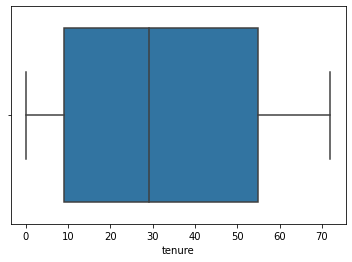

In [ ]:
sns.boxplot(df.tenure)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


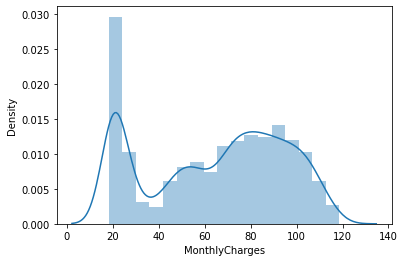

In [ ]:
sns.distplot(df.MonthlyCharges)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


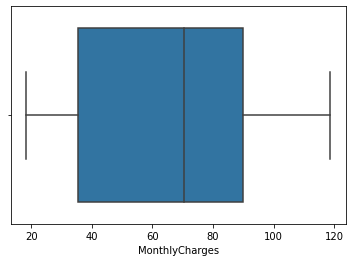

In [ ]:
sns.boxplot(df.MonthlyCharges)

In [3]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5626 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5626 non-null   category
 1   gender            5626 non-null   category
 2   SeniorCitizen     5626 non-null   int64   
 3   Partner           5626 non-null   category
 4   Dependents        5626 non-null   category
 5   tenure            5626 non-null   int64   
 6   PhoneService      5626 non-null   category
 7   MultipleLines     5626 non-null   category
 8   InternetService   5626 non-null   category
 9   OnlineSecurity    5626 non-null   category
 10  OnlineBackup      5626 non-null   category
 11  DeviceProtection  5626 non-null   category
 12  TechSupport       5626 non-null   category
 13  StreamingTV       5626 non-null   category
 14  StreamingMovies   5626 non-null   category
 15  Contract          5626 non-null   category
 16  PaperlessBilling  5626 n

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


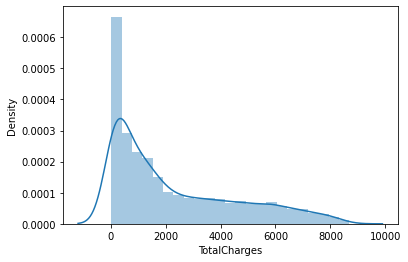

In [ ]:
sns.distplot(df.TotalCharges)

Above graph shows right skewed distribution of total charges column

In [ ]:
df['TotalCharges']=np.log(df['TotalCharges'])

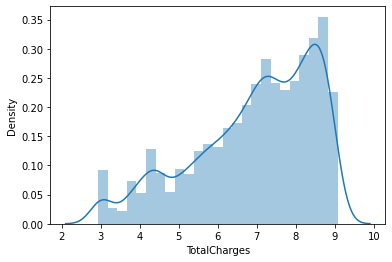

In [9]:
sns.distplot(df.TotalCharges)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


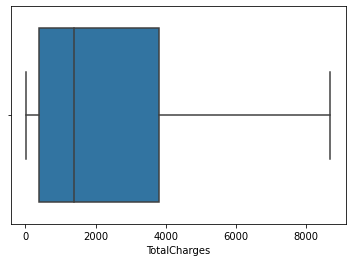

In [ ]:
sns.boxplot(df.TotalCharges)

There are no outliers in numerical columns

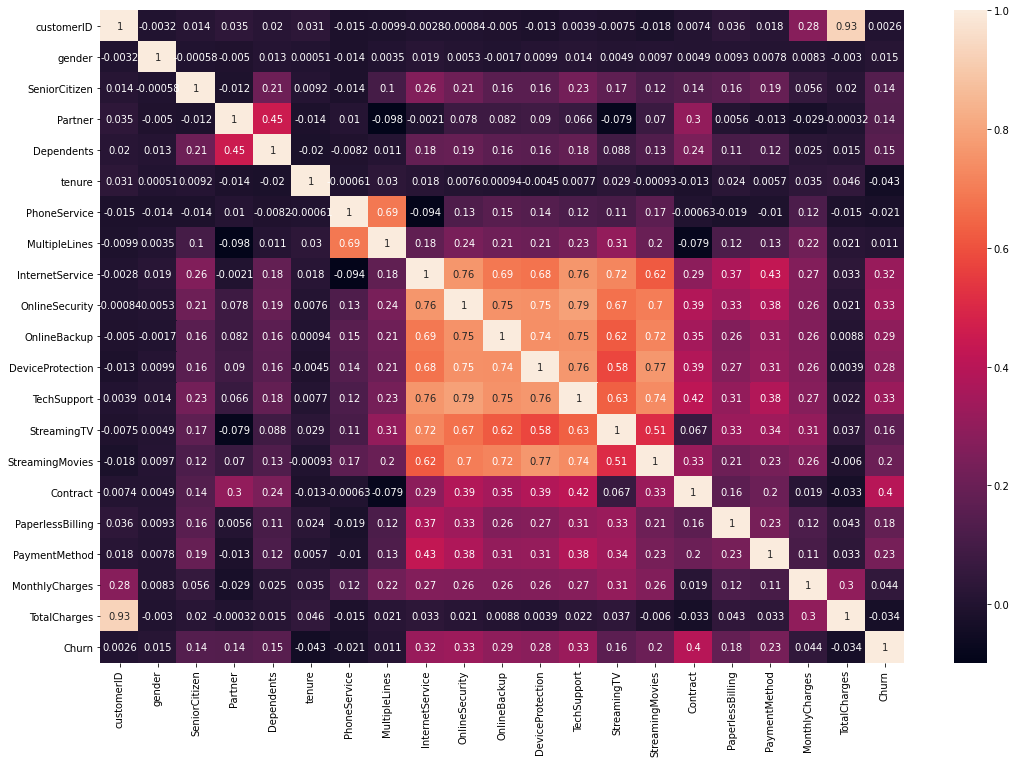

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
corr=df.corr()
sns.heatmap(corr,data=df,annot=True)

There is no substantial multi-collinearity between features.

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

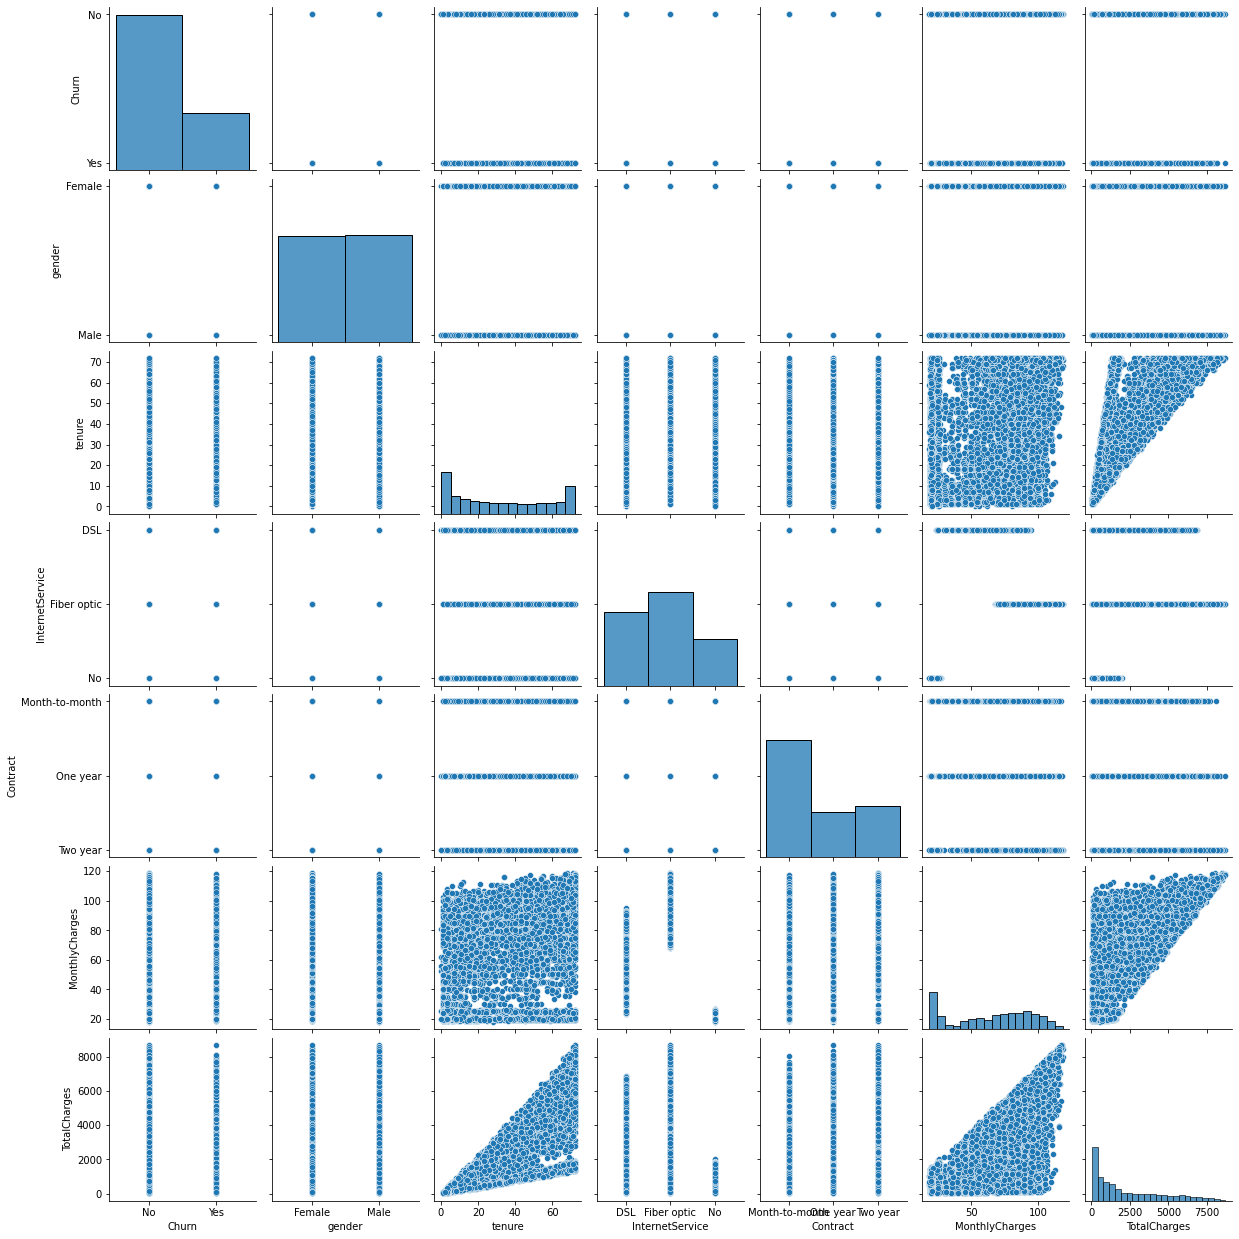

In [ ]:
plt.figure(figsize=(18,12))
sns.pairplot(data=df,vars=["Churn","gender", "tenure","InternetService", "Contract","MonthlyCharges", "TotalCharges"])

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

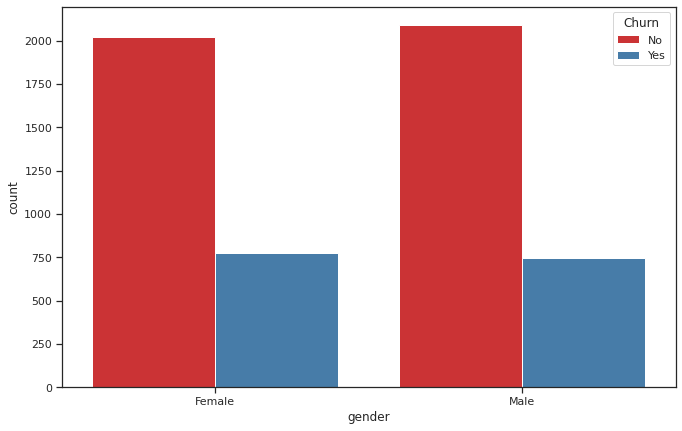

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='gender', hue='Churn', data=df,palette='Set1')

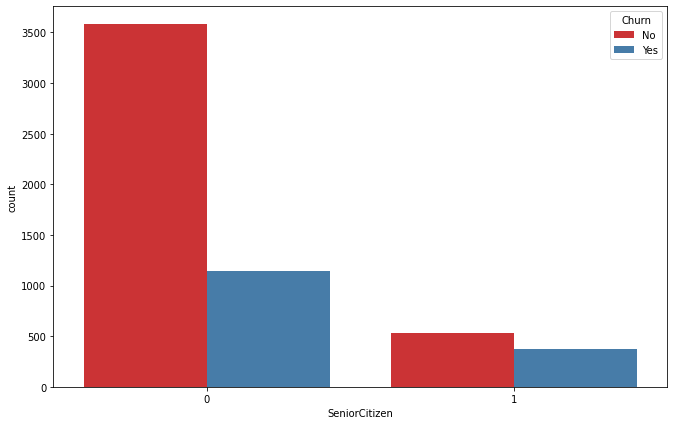

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df,palette='Set1')

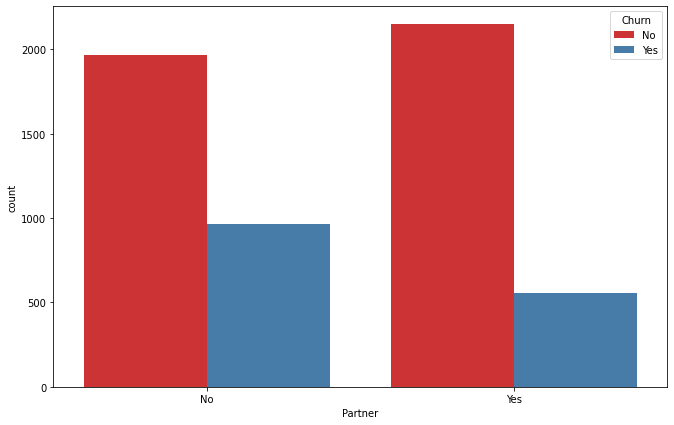

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='Partner', hue='Churn', data=df,palette='Set1')

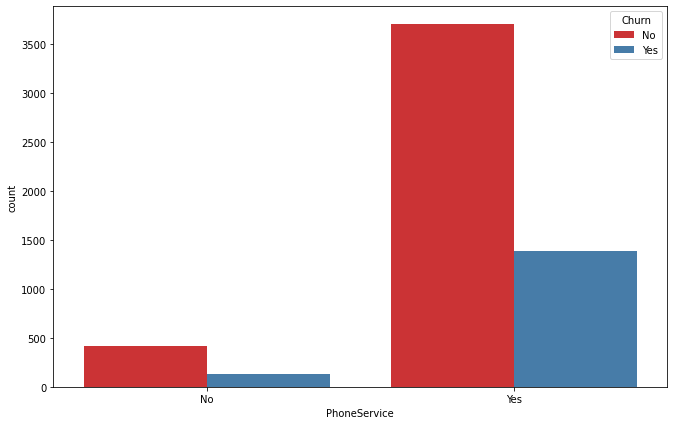

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='PhoneService', hue='Churn', data=df,palette='Set1')

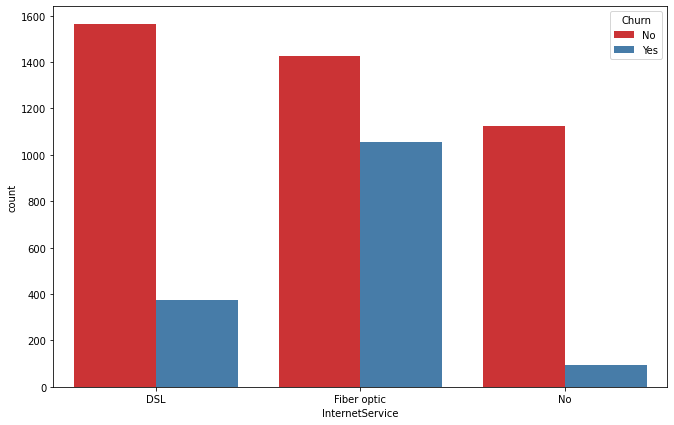

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='InternetService', hue='Churn', data=df,palette='Set1')

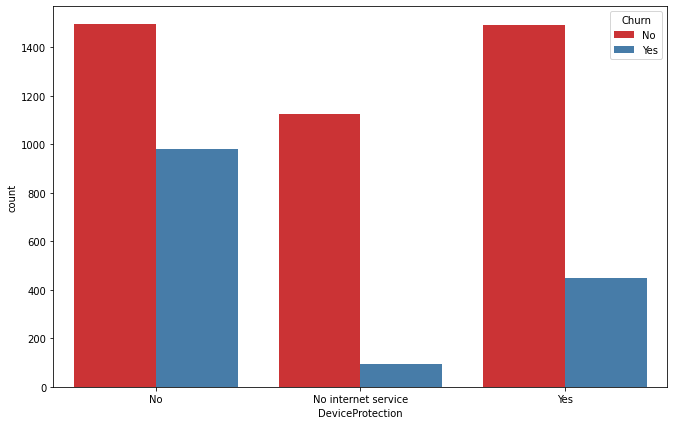

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='DeviceProtection', hue='Churn', data=df,palette='Set1')

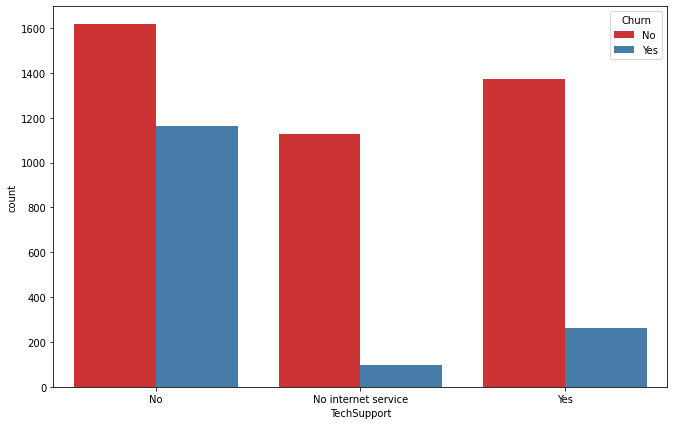

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='TechSupport', hue='Churn', data=df,palette='Set1')

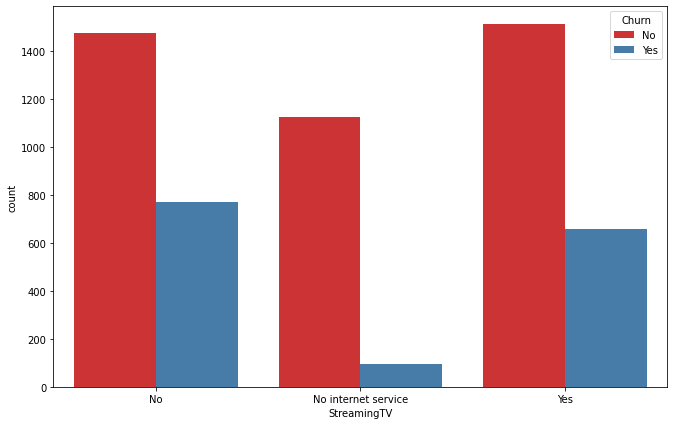

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='StreamingTV', hue='Churn', data=df,palette='Set1')

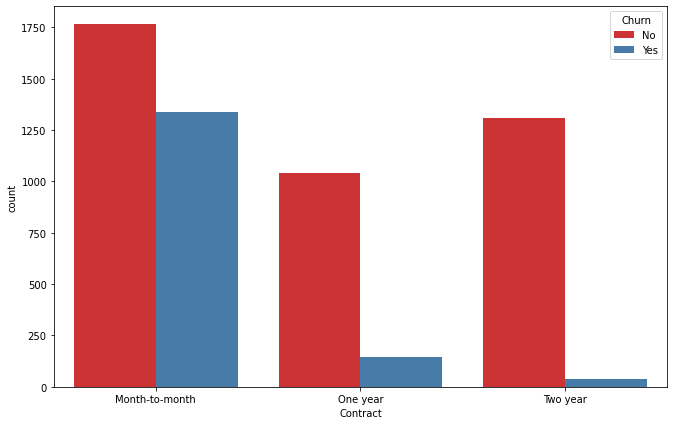

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='Contract', hue='Churn', data=df,palette='Set1')

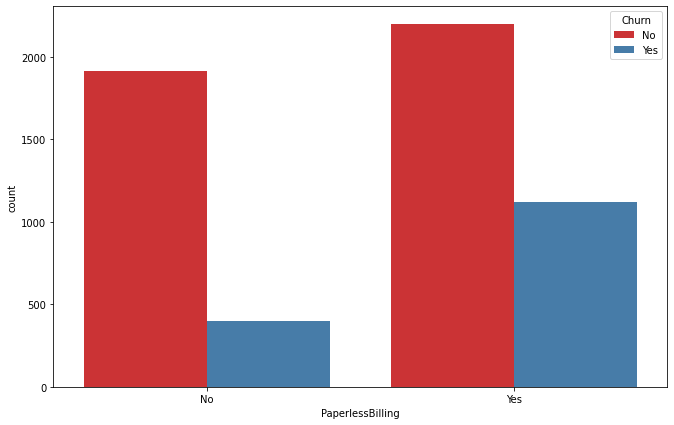

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df,palette='Set1')

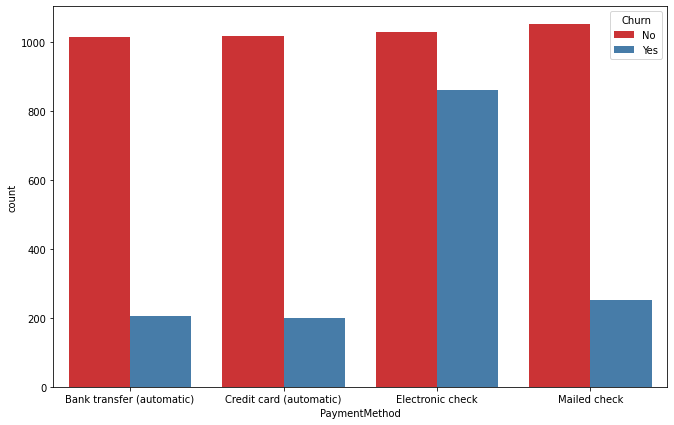

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='PaymentMethod', hue='Churn', data=df,palette='Set1')

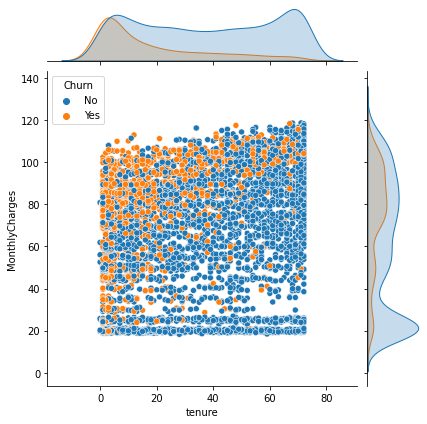

In [ ]:
sns.jointplot(x='tenure', y='MonthlyCharges', data=df, kind='scatter',hue='Churn')

Low tenure and high monthly Charges have maximum churning 

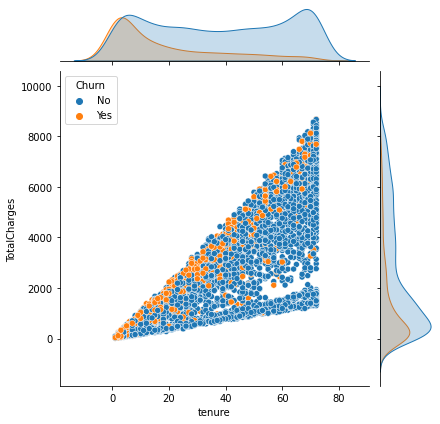

In [ ]:
sns.jointplot(x='tenure', y='TotalCharges', data=df, kind='scatter',hue='Churn')

# Data preprocessing

In [10]:
df.drop(columns=['customerID'],inplace=True)

In [11]:
number_feat=['tenure','MonthlyCharges','TotalCharges']

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[(number_feat)]=scaler.fit_transform(df[(number_feat)])

In [13]:
onehot_feat=[]
for col in df.columns:
    if col not in number_feat :
        onehot_feat.append(col)

In [14]:
onehot_feat.remove('Churn')
onehot_feat.remove('SeniorCitizen')

In [15]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(data=df,columns=(onehot_feat),drop_first=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Churn=le.fit_transform(df.Churn)

In [ ]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.828184,-1.498618,-0.892383,0,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
1,0,0.394297,0.301968,0.388267,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0
2,0,1.576028,0.011283,1.059525,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,1.576028,0.685672,1.773983,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0
4,0,-0.094696,0.185694,-0.104101,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [17]:
# specify input and output attributes
X = df.drop(columns=['Churn'], axis=1)
y = df['Churn']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5626 entries, 0 to 5633
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5626 non-null   int64  
 1   tenure                                 5626 non-null   float64
 2   MonthlyCharges                         5626 non-null   float64
 3   TotalCharges                           5626 non-null   float64
 4   Churn                                  5626 non-null   int64  
 5   gender_Male                            5626 non-null   uint8  
 6   Partner_Yes                            5626 non-null   uint8  
 7   Dependents_Yes                         5626 non-null   uint8  
 8   PhoneService_Yes                       5626 non-null   uint8  
 9   MultipleLines_No phone service         5626 non-null   uint8  
 10  MultipleLines_Yes                      5626 non-null   uint8  
 11  Inte

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
x_train.shape

(4219, 30)

In [ ]:
x_test.shape

(1407, 30)

# Statsmodel analysis and prediction

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)

logreg = sm.Logit(y, X)


In [ ]:
result = logreg.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.419929
         Iterations 8


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5626
Model:                          Logit   Df Residuals:                     5602
Method:                           MLE   Df Model:                           23
Date:                Wed, 12 May 2021   Pseudo R-squ.:                  0.2805
Time:                        08:54:57   Log-Likelihood:                -2362.5
converged:                       True   LL-Null:                       -3283.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6874   2.43e+06  -6.94e-07      1.000   -4.76e+06    4.76e+06
SeniorCitizen                             0.1957      0.093      2.097      0.036       0.013       0.379
tenure                                   -1.5327      0.140    -10.945      0.000      -1.807      -1.258
MonthlyCharges                           -1.1432      0.152     -7.514      0.000      -1.441      -0.845
TotalCharges                              0.7867      0.176      4.458      0.000       0.441       1.133
gender_Male                              -0.0275      0.072     -0.383      0.702      -0.168       0.113
Partner_Yes                               0.0321      0.087      0.371      0.711      -0.138       0.202
Dependents_Yes                           -0.0588      0.099     -0.593      0.553      -0.253       0.136
PhoneService_Yes                         -0.7428   1.92e+06  -3.87e-07      1.000   -3.77e+06    3.77e+06
MultipleLines_No phone service           -0.9446   1.04e+06  -9.12e-07      1.000   -2.03e+06    2.03e+06
MultipleLines_Yes                         0.4176      0.081      5.143      0.000       0.258       0.577
InternetService_Fiber optic               1.7086      0.113     15.064      0.000       1.486       1.931
InternetService_No                       -0.2485        nan        nan        nan         nan         nan
OnlineSecurity_No internet service       -0.2485   4.13e+15  -6.02e-17      1.000   -8.09e+15    8.09e+15
OnlineSecurity_Yes                       -0.1931      0.084     -2.288      0.022      -0.358      -0.028
OnlineBackup_No internet service         -0.2485   6.74e+07  -3.69e-09      1.000   -1.32e+08    1.32e+08
OnlineBackup_Yes                          0.0053      0.082      0.064      0.949      -0.156       0.167
DeviceProtection_No internet service     -0.2485        nan        nan        nan         nan         nan
DeviceProtection_Yes                      0.0980      0.081      1.209      0.226      -0.061       0.257
TechSupport_No internet service          -0.2485        nan        nan        nan         nan         nan
TechSupport_Yes                          -0.1629      0.096     -1.696      0.090      -0.351       0.025
StreamingTV_No internet service          -0.2485   6.79e+14  -3.66e-16      1.000   -1.33e+15    1.33e+15
StreamingTV_Yes                           0.5117      0.096      5.347      0.000       0.324       0.699
StreamingMovies_No internet service      -0.2485   4.79e+14  -5.19e-16      1.000   -9.38e+14    9.38e+14
StreamingMovies_Yes                       0.6183        nan        nan        nan         nan         nan
Contract_One year                        -0.6392      0.117     -5.462      0.000      -0.869      -0.410
Contract_Two year                        -1.3991      0.193     -7.259      0.000      -1.777      -1.021
PaperlessBilling_Yes                      0.3251      0.081  

In [ ]:
pred=(result.predict(X) >= 0.4).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm = confusion_matrix(y, pred)
print(cm)
print(classification_report(y,pred))
print("accuracy score",accuracy_score(y,pred))

[[3415  690]
 [ 505 1016]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4105
           1       0.60      0.67      0.63      1521

    accuracy                           0.79      5626
   macro avg       0.73      0.75      0.74      5626
weighted avg       0.80      0.79      0.79      5626

accuracy score 0.78759331674369


# Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

dual=[True,False]
max_iter=[100,110,120,130,140]

# Create hyperparameter options
param_grid = dict(C=C, penalty=penalty,dual=dual,max_iter=max_iter)

In [ ]:
clf = GridSearchCV(model, param_grid=param_grid, cv=3, verbose=0,n_jobs=-1)
best_model = clf.fit(X, y)

In [ ]:
# View best hyperparameters

print("Best: %f using %s" % (best_model.best_score_, best_model.best_params_))


Best: 0.801636 using {'C': 2.7825594022071245, 'dual': False, 'max_iter': 100, 'penalty': 'l2'}


In [19]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=5,scoring='accuracy')
    print("Cross validation is",np.mean(score)*100)
    

# logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C= 2.7825594022071245, dual= False, max_iter= 100, penalty='l2')
classify(model, X, y)

Accuracy is 81.2366737739872
Cross validation is 80.34128281034143


In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print("accuracy score",accuracy_score(y_test,y_pred))

[[946  96]
 [168 197]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.67      0.54      0.60       365

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.80      0.81      0.81      1407

accuracy score 0.8123667377398721


# Best features

In [ ]:



#features names
names_of_variables =X.columns

weights = model.coef_[0]
abs_weights = np.abs(weights)

#get the sorting indices
sorted_index = np.argsort(abs_weights)[::-1]

#check if the sorting indices are correct
print(abs_weights[sorted_index])

#get the index of the top-10 features
top_10 = sorted_index[:10]

#get the names of the top 10 most important features
print(names_of_variables[top_10])

[1.43880357 1.40620453 1.39088751 0.7669974  0.69947886 0.60672861
 0.54781508 0.37261933 0.32062555 0.29313638 0.29109504 0.28561577
 0.19789029 0.19789029 0.19789029 0.19789029 0.19789029 0.19789029
 0.19789029 0.17876007 0.12628557 0.11569465 0.09892385 0.06379273
 0.05248367 0.04800606 0.0442393  0.04233322 0.02985387 0.00808175]
Index(['tenure', 'Contract_Two year', 'InternetService_Fiber optic',
       'MonthlyCharges', 'TotalCharges', 'Contract_One year',
       'StreamingMovies_Yes', 'MultipleLines_Yes', 'StreamingTV_Yes',
       'TechSupport_Yes'],
      dtype='object')


# ROAUC curve

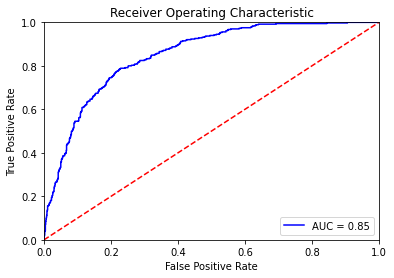

In [22]:
from sklearn import metrics
probs = model.predict_proba(x_test)
pred = probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr1, tpr1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Threshold adjustment

In [23]:
preds1 = np.where(model.predict_proba(x_test)[:,1]> 0.5,1,0)
cm = confusion_matrix(y_test, preds1)
print(cm)
print(classification_report(y_test,preds1))
print("accuracy score",accuracy_score(y_test,preds1))

[[946  96]
 [168 197]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.67      0.54      0.60       365

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.80      0.81      0.81      1407

accuracy score 0.8123667377398721


In [24]:
preds1 = np.where(model.predict_proba(x_test)[:,1]> 0.4,1,0)
cm = confusion_matrix(y_test, preds1)
print(cm)
print(classification_report(y_test,preds1))
print("accuracy score",accuracy_score(y_test,preds1))


[[888 154]
 [124 241]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1042
           1       0.61      0.66      0.63       365

    accuracy                           0.80      1407
   macro avg       0.74      0.76      0.75      1407
weighted avg       0.81      0.80      0.80      1407

accuracy score 0.8024164889836531


In [25]:
preds1 = np.where(model.predict_proba(x_test)[:,1]> 0.3,1,0)
cm = confusion_matrix(y_test, preds1)
print(cm)
print(classification_report(y_test,preds1))
print("accuracy score",accuracy_score(y_test,preds1))

[[788 254]
 [ 76 289]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1042
           1       0.53      0.79      0.64       365

    accuracy                           0.77      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.77      0.78      1407

accuracy score 0.7654584221748401


# Support vector machine

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 0)
classify(model, X, y)

Accuracy is 79.74413646055437
Cross validation is 79.77244128675744


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print("accuracy score",accuracy_score(y_test,y_pred))

[[933 109]
 [176 189]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1042
           1       0.63      0.52      0.57       365

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

accuracy score 0.7974413646055437


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf')
classify(model, X, y)

Accuracy is 79.67306325515281
Cross validation is 79.73707519242154


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print("accuracy score",accuracy_score(y_test,y_pred))

[[950  92]
 [194 171]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1042
           1       0.65      0.47      0.54       365

    accuracy                           0.80      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407

accuracy score 0.7967306325515281


# Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classify(model, X, y)

Accuracy is 64.53447050461976
Cross validation is 65.60573120189461


# KNN

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))



Text(0, 0.5, 'Error Rate')

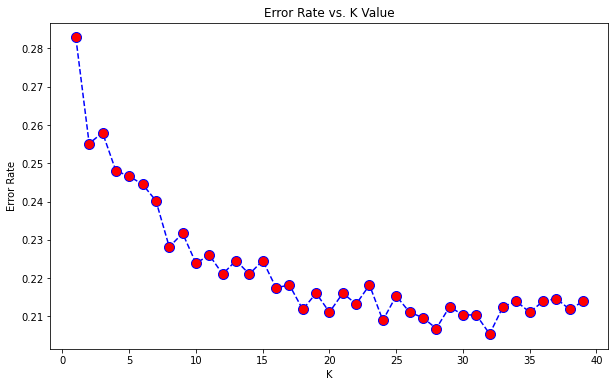

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)


print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print("accuracy score",accuracy_score(y_test,pred))



[[933 109]
 [167 198]]


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1042
           1       0.64      0.54      0.59       365

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407



accuracy score 0.8038379530916845


# Decision Tree and Ensemble Algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 73.41862117981522
Cross validation is 71.77368857312018


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[849 193]
 [178 187]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1042
           1       0.49      0.51      0.50       365

    accuracy                           0.74      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407



In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 80.73916133617625
Cross validation is 78.74153542530097


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[955  87]
 [184 181]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1042
           1       0.68      0.50      0.57       365

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.72      1407
weighted avg       0.80      0.81      0.80      1407



In [ ]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 77.96730632551528
Cross validation is 77.01743832642589


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[936 106]
 [204 161]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1042
           1       0.60      0.44      0.51       365

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.76      0.78      0.77      1407



# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[937 105]
 [186 179]]


0.7931769722814499

In [ ]:
pca.explained_variance_ratio_

array([0.4659301 , 0.22439591, 0.07216186])

# Boosting

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model, X, y)

Accuracy is 80.09950248756219
Cross validation is 80.16363134004342


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[945  97]
 [183 182]]


0.8009950248756219

# Test Set Prediction

In [26]:
#loading test set
df1=pd.read_csv('churn_test.csv')

In [ ]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [ ]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [27]:
df1[df1.select_dtypes(['object']).columns] = df1.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [28]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'],errors = 'coerce')

In [29]:
df1['TotalCharges']=np.log(df1['TotalCharges'])

In [30]:
df1.drop(columns=['customerID'],inplace=True)

In [31]:
number_feat=['tenure','MonthlyCharges','TotalCharges']

In [32]:
df1[(number_feat)]=scaler.transform(df1[(number_feat)])

In [33]:
onehot_feat=[]
for col in df1.columns:
    if col not in number_feat :
        onehot_feat.append(col)

In [34]:
onehot_feat.remove('SeniorCitizen')

In [35]:
from sklearn.preprocessing import OneHotEncoder
df1 = pd.get_dummies(data=df1,columns=(onehot_feat),drop_first=True)

In [ ]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.353547,0.499633,0.458958,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1.372281,1.248770,1.849440,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0
2,0,-0.828184,-0.658123,-0.775006,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,-1.113429,-0.472085,-0.896090,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,-0.909682,0.036198,-0.715125,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1


In [36]:
df1 = df1.fillna(0)

In [37]:
Z=df1.values

Logistic regression is chosen for final prediction since it has maximum accuracy.

In [38]:
Final_pred = np.where(model.predict_proba(Z)[:,1]> 0.5,1,0)

In [ ]:
prediction = pd.DataFrame(Final_pred).to_csv('submission.csv')